In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
data = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [3]:
data.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [4]:
data['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [5]:
# Dropping columns
data_clean = data[['uniq_id', 'product_name', 'product_category_tree', 'image', 'description']]

# Retrieving product category

In [6]:
# Total number of categories
len(data_clean['product_category_tree'].unique())

642

In [7]:
data_clean['product_category_tree'].sample()

572    ["Watches >> Wrist Watches >> Times Wrist Watc...
Name: product_category_tree, dtype: object

In [8]:
# Splitting product_category_tree
df_categ = data_clean['product_category_tree'].str.split(pat = '>>', expand = True)
df_categ.head(10)

,0,1,2,3,4,5,6
0,"[""Home Furnishing",Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,None,None,None
1,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",None,None
2,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,None,None
3,"[""Home Furnishing",Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,None,None
4,"[""Home Furnishing",Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,None,None
5,"[""Watches",Wrist Watches,"Maserati Time Wrist Watches""]",None,None,None,None
6,"[""Watches",Wrist Watches,"Camerii Wrist Watches""]",None,None,None,None
7,"[""Watches",Wrist Watches,"T STAR Wrist Watches""]",None,None,None,None
8,"[""Watches",Wrist Watches,"Alfajr Wrist Watches""]",None,None,None,None
9,"[""Watches",Wrist Watches,"TAG Heuer Wrist Watches""]",None,None,None,None


In [9]:
df_categ[0].str[:2].unique()

array(['["'], dtype=object)

In [10]:
# Dropping [] and "" characters
df_categ[0] = df_categ[0].apply(lambda x: str(x)[2:] if str(x)[:2] == '["' else x)

for c in np.arange(0,7,1):
    df_categ[c] = df_categ[c].apply(lambda x: str(x)[:-2] if str(x)[-2:] == '"]' else x)
    
df_categ.head(10)

,0,1,2,3,4,5,6
0,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,None,None,None
1,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",None,None
2,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,None,None
3,Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,None,None
4,Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,None,None
5,Watches,Wrist Watches,Maserati Time Wrist Watches,None,None,None,None
6,Watches,Wrist Watches,Camerii Wrist Watches,None,None,None,None
7,Watches,Wrist Watches,T STAR Wrist Watches,None,None,None,None
8,Watches,Wrist Watches,Alfajr Wrist Watches,None,None,None,None
9,Watches,Wrist Watches,TAG Heuer Wrist Watches,None,None,None,None


In [11]:
df_categ.nunique()

0      7
1     63
2    246
3    350
4    297
5    117
6     57
dtype: int64

In [12]:
df_categ[0].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [13]:
df_categ[1].sort_values().unique()

array([' Baby & Kids Gifts ', ' Baby Bath & Skin ', ' Baby Bedding ',
       ' Baby Grooming ', ' Bar & Glassware ', ' Bath Linen ',
       ' Bath and Spa ', ' Beauty Accessories ', ' Bed Linen ',
       ' Body and Skin Care ', ' Candles & Fragrances ', ' Clocks ',
       ' Coffee Mugs ', ' Combos and Kits ', ' Computer Components ',
       ' Computer Peripherals ', ' Consumables & Disposables ',
       ' Containers & Bottles ', ' Cookware ', ' Curtains & Accessories ',
       ' Cushions, Pillows & Covers ', ' Decorative Lighting & Lamps ',
       ' Diapering & Potty Training ', ' Dinnerware & Crockery ',
       ' Eye Care ', ' Feeding & Nursing ', ' Floor Coverings ',
       ' Flowers, Plants & Vases ', ' Fragrances ',
       ' Furniture & Furnishings ', ' Garden & Leisure ', ' Hair Care ',
       ' Health Care ', ' Housekeeping & Laundry ', ' Infant Wear ',
       ' JMD Home Furnishing ', ' Kitchen & Dining Linen ',
       ' Kitchen Tools ', " Kripa's Home Furnishing ",
       ' Lapt

In [14]:
# Checking whether each category 1 is associated to a single category_0
df_categ.columns = ['categ_'+str(x) for x in df_categ.columns]
df_categ['count'] = 1
s_ = df_categ.pivot_table(index = 'categ_1', columns = 'categ_0', values = 'count').sum(axis = 1)
s_[s_ != 1]

Series([], dtype: float64)

In [15]:
# Joining categ_1 in data_clean
data_clean.drop(columns = 'product_category_tree', inplace = True)
data_clean = data_clean.join(df_categ['categ_1']).copy()
data_clean.rename(columns = {'categ_1' : 'product_category'}, inplace = True)

C:\Users\alexa_000\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Product description

In [16]:
data_clean['description'].sample()

488    Buy Rega IT Hp Pavilion DV6-6080SF DV6-6081EI ...
Name: description, dtype: object

In [17]:
# Turning text data into 'description-token' matrix
from sklearn.feature_extraction.text import CountVectorizer
c_vect = CountVectorizer(stop_words = 'english')
X = c_vect.fit_transform(data_clean['description'])

In [20]:
df_ = pd.DataFrame(X.toarray())
df_

,0,1,2,3,4,5,6,7,8,9,...,5833,5834,5835,5836,5837,5838,5839,5840,5841,5842
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


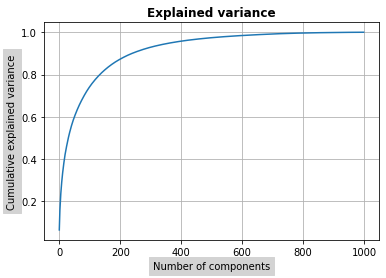

240 components explain 90.0% of variance
367 components explain 95.0% of variance
675 components explain 99.0% of variance


In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1000)
pca.fit(df_)

# Explained variance
s_ = pca.explained_variance_ratio_.cumsum()
plt.plot(pca.explained_variance_ratio_.cumsum())

plt.title('Explained variance', fontweight = 'bold')
plt.xlabel('Number of components', backgroundcolor = 'lightgrey')
plt.ylabel('Cumulative explained variance', backgroundcolor = 'lightgrey')

plt.grid(True)
plt.show()

for val in [0.9, 0.95, 0.99]:
    x = len(s_[s_<val])
    print('{} components explain {}% of variance'.format(x, 100*val))

In [35]:
# Reducing number of features down to 400
pca = PCA(n_components = 400)
df_shrink = pd.DataFrame(pca.fit_transform(df_))

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,4.372246,-3.193555,-1.624985,-3.065905,-0.039689,0.706242,0.127074,-1.458605,-1.683236,0.219241,...,-0.121144,-0.045252,-0.024001,0.100800,0.010942,0.005757,0.036299,0.136018,-0.016019,0.070354
1,2.456789,-2.110170,-1.528936,-0.023596,-0.240769,0.033081,0.075855,0.076406,0.492576,0.516897,...,0.060943,0.454196,0.561598,0.051806,0.084129,-0.444532,0.206711,-0.253853,0.370176,0.326492
2,5.306156,-3.074288,-2.279311,0.310929,1.208873,-0.144308,0.629411,2.222897,2.731644,0.665620,...,-0.009186,-0.026349,0.102097,0.029886,0.076741,-0.039625,0.093959,0.045545,-0.063583,-0.117513
3,6.347664,-5.523300,-5.184454,-6.678621,-3.586733,2.898729,-2.351271,8.350634,2.101716,-2.540539,...,0.404380,0.000317,-0.262937,-0.040997,0.038447,0.027051,0.196558,-0.157081,-0.073249,0.092277
4,8.283456,-5.461928,-5.720529,-7.263003,-3.271246,2.923073,-2.335736,10.322278,4.064841,-2.075083,...,-0.303585,0.059065,0.135209,0.034217,0.073278,-0.086215,0.045739,0.048970,0.025994,-0.200940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.755906,-0.600298,-0.425012,-1.379879,1.302460,-0.009258,0.862569,-3.004501,-1.024156,0.175443,...,0.046392,-0.019910,0.002585,0.001689,0.013732,0.008312,0.020553,-0.008286,-0.003192,0.011799
1046,2.789362,-0.532497,0.700475,-2.176046,1.741636,-0.310218,2.874339,-0.976072,0.455018,-0.770034,...,-0.005848,-0.004348,0.006787,0.000573,-0.022665,-0.001735,-0.019185,0.017930,-0.017683,-0.028106
1047,-1.912266,0.899591,-0.126909,-0.197988,-0.150580,-0.025137,0.011020,0.046902,-0.269070,-0.769514,...,-0.541016,-0.109797,-0.459530,0.212293,0.217085,0.478111,-0.429328,0.204294,-0.398446,-0.716889
1048,-1.879370,0.884698,-0.160778,-0.270503,-0.088475,-0.075910,-0.056639,-0.087732,-0.266339,-0.732773,...,0.000326,0.037873,0.026318,-0.082664,-0.095096,-0.105285,0.015364,-0.035046,0.078408,0.158461
